| <h1> Assignment 9.1 | <h1> Convolutional Neural Network </h1> |
|--- | --- |
**Name:** Jomarie Dupaya
**Course and Section:** CPE019, CPE32S3 <br>
**Instructor:** Engr. Roman Richard
**Date Performed:** 4/25/24
**Date Submitted:** 4/27/24

<hr>

Title: Lions or Cheetahs - Image Classification

Dataset Link: https://www.kaggle.com/datasets/mikoajfish99/lions-or-cheetahs-image-classification

The problem is to predict which animal classifies the follwing images if the image is Lion or Cheetah since both have almost the same color but has different structure and skin pattern.

#Using your dataset, create a baseline model of the CNN

In [1]:
import time
start_time = time.time()
from google.colab import drive
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
from numpy import mean, std
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive')

# Define the image dimensions
img_width, img_height = 28, 28

# Define paths for the data folders for lions and cheetahs
data_directory = "/content/drive/My Drive/Colab Notebooks/dataset/lioncheetah"

lions_directory = os.path.join(data_directory, "Lions")
cheetahs_directory = os.path.join(data_directory, "Cheetahs")

# Get the list of file paths for lions and cheetahs images
lions_file_paths = [os.path.join(lions_directory, filename) for filename in os.listdir(lions_directory)]
cheetahs_file_paths = [os.path.join(cheetahs_directory, filename) for filename in os.listdir(cheetahs_directory)]

# Create labels for lions (0) and cheetahs (1)
y_lions = np.zeros(len(lions_file_paths))
y_cheetahs = np.ones(len(cheetahs_file_paths))

# Concatenate paths and labels
X_paths = lions_file_paths + cheetahs_file_paths
y = np.concatenate([y_lions, y_cheetahs])

# Convert y to strings
y = y.astype(str)

# Create a DataFrame with paths and labels
df = pd.DataFrame({'filename': X_paths, 'label': y})

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

def preprocess_image(image):
    resized_image = tf.image.resize(image, [img_width, img_height])
    resized_image = tf.reshape(resized_image, [img_width, img_height, 3])
    resized_image = tf.cast(resized_image, tf.float32)
    return resized_image

# Define data generators for training and testing with preprocessing function
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=9,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=9,
    class_mode='binary'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 160 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.


> 60.000
> 50.000
> 52.500
> 62.500
> 50.000


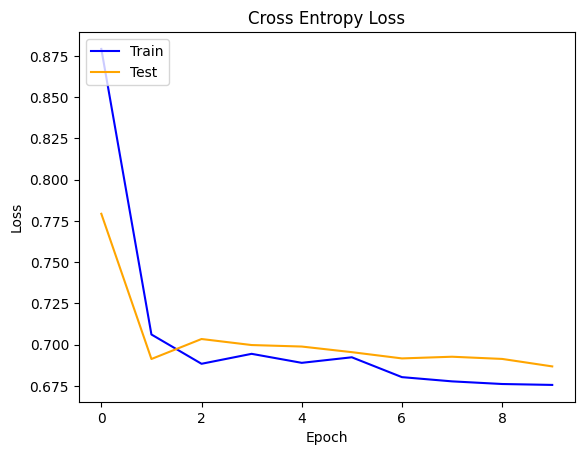

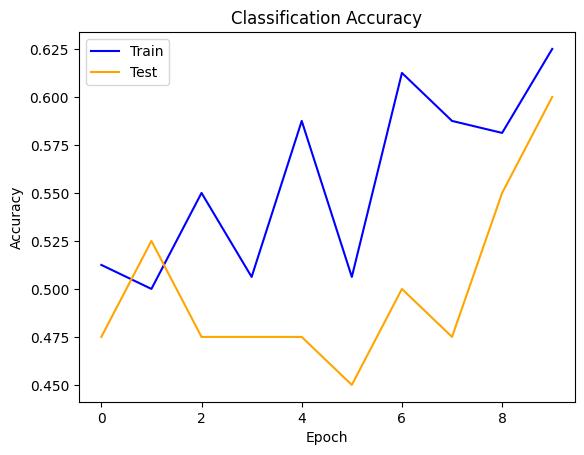

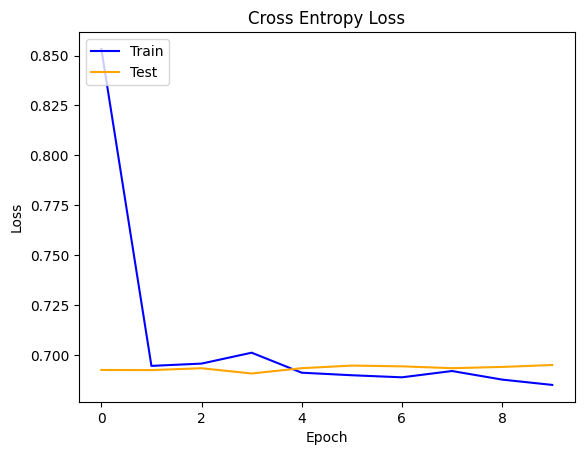

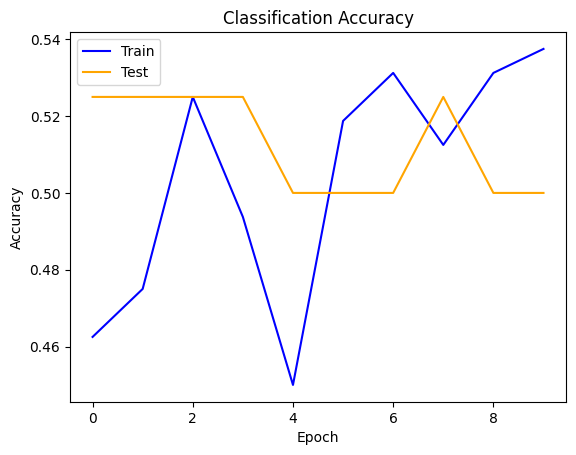

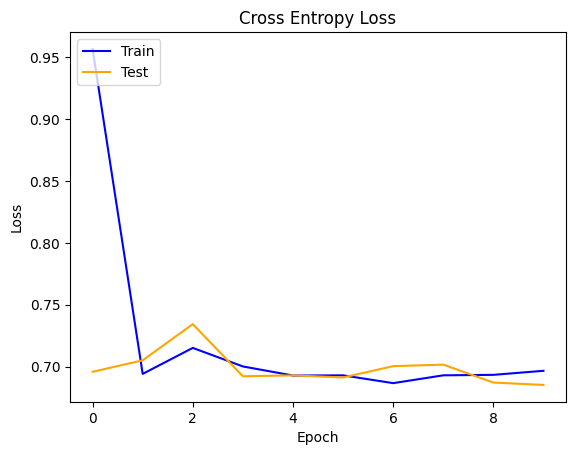

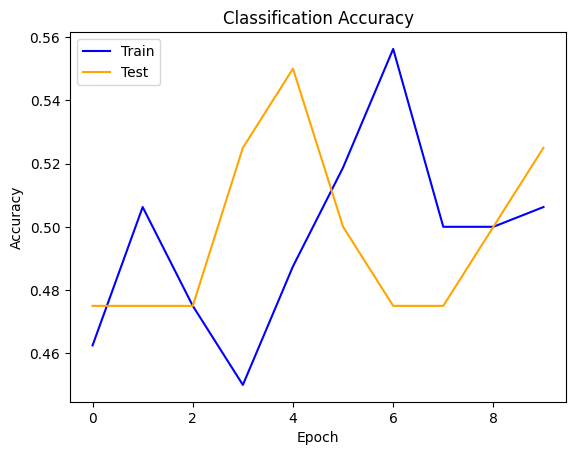

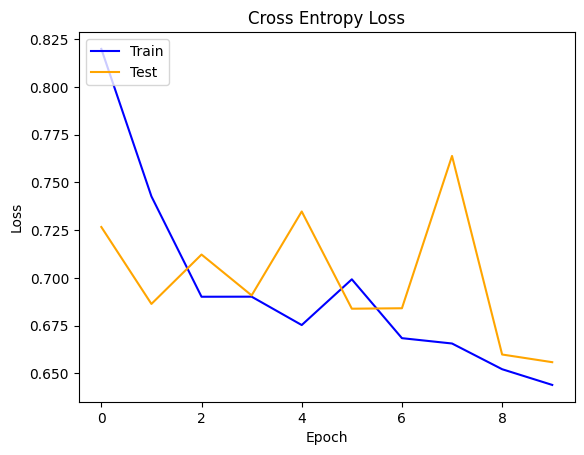

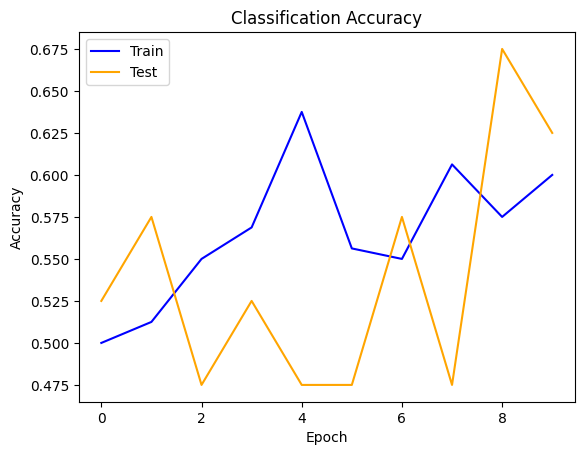

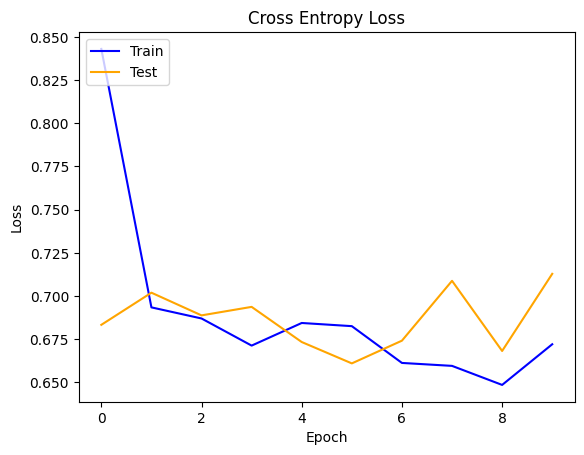

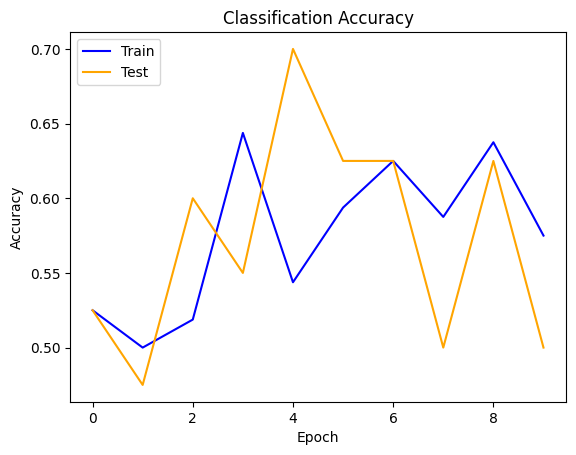

Accuracy: mean=55.000 std=5.244, n=5


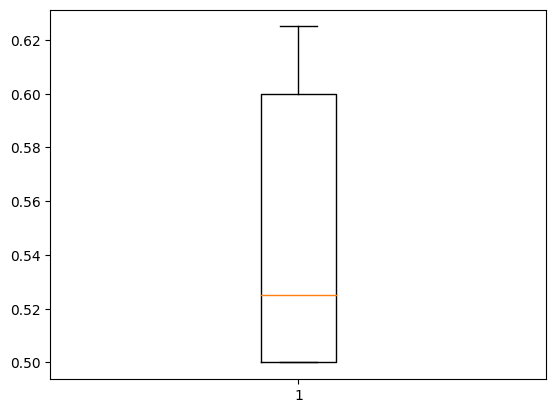

In [2]:
# Define CNN model with baseline architecture
def define_baseline_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(train_generator, test_generator, model_builder, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(train_generator):
        # define model
        model = model_builder()
        # fit model
        history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator), verbose=0)
        # evaluate model
        _, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for history in histories:
        # plot loss
        plt.plot(history.history['loss'], color='blue', label='train')
        plt.plot(history.history['val_loss'], color='orange', label='test')
        plt.title('Cross Entropy Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        # plot accuracy
        plt.plot(history.history['accuracy'], color='blue', label='train')
        plt.plot(history.history['val_accuracy'], color='orange', label='test')
        plt.title('Classification Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

# entry point, run the test harness
scores, histories = evaluate_model(train_generator, test_generator, define_baseline_model)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

**Remarks:** The baseline model cannot predict mostly of the images and its finding a hard time to process since the preprocessing is heavy on computing power of my devices therefore there are limits to the preprocessing hence the low accuracy.

#Data Image Augmentation

Found 160 validated image filenames belonging to 2 classes.


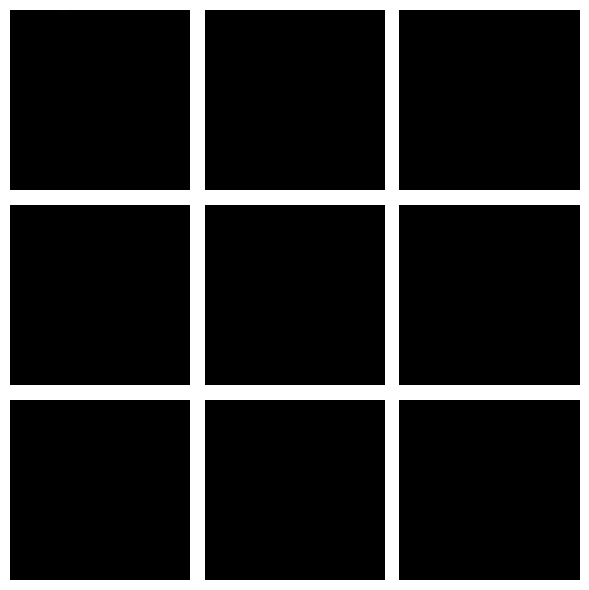

In [3]:
# Random Rotations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image,
    rotation_range=20,  # Random rotations between -20 and +20 degrees
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Generate augmented images
augmented_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=9,
    class_mode='binary'
)

# Plot a grid of augmented images
fig, ax = plt.subplots(3, 3, figsize=(6, 6))
for i in range(3):
    for j in range(3):
        image, label = augmented_images.next()
        # Ensure pixel values are within the valid range for imshow
        image = np.clip(image[0], 0, 1)
        ax[i, j].imshow(image.astype('uint8'))
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()

**Remarks:** The image is black due to the settings of the preprocessing to limit the memory from being all used and crash on colab.

0.0 0.3477117 1.0


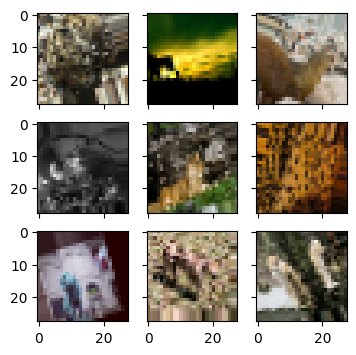

In [4]:
# Image Standardization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    featurewise_center=True,
    featurewise_std_normalization=True
)

# Retrieve one batch of images
X_batch, y_batch = next(train_generator)

# Ensure pixel values are within the valid range
X_batch_clipped = np.clip(X_batch, 0, 1)

print(X_batch_clipped.min(), X_batch_clipped.mean(), X_batch_clipped.max())

# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        # Ensure pixel values are within the valid range for imshow
        ax[i][j].imshow(X_batch_clipped[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

**Remarks:** The image standarization proven to be working properly and it processes the images in standardized forms. however it is blurry due to resizing the image to fit in memory.

In [ ]:
# ZCA Whitening
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    zca_whitening=True
)

# Retrieve one batch of images
X_batch, y_batch = next(train_generator)

# ZCA whitening
zca_whitened_batch = train_datagen.standardize(X_batch)

# Reshape the batch for visualization
zca_whitened_batch = zca_whitened_batch.reshape((len(zca_whitened_batch), img_width, img_height, 3))

# Display statistics
print(zca_whitened_batch.min(), zca_whitened_batch.mean(), zca_whitened_batch.max())

# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        # Ensure pixel values are within the valid range for imshow
        ax[i][j].imshow(zca_whitened_batch[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

**Remarks:** The ZCA had a hard time to process the images which causes my devices to put in a maximum limits and crash however I tried different techniques to solve it but my colab kept crashing to losing available ram.

#Save augmented image data to disk

In [ ]:
# Save augmented image data to disk
output_directory = "/content/drive/My Drive/Colab Notebooks/dataset/augmented_images"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define a function to save augmented images
def save_augmented_images(datagen, generator, output_dir, prefix='augmented_image'):
    for i, (X_batch, y_batch) in enumerate(datagen.flow(generator, batch_size=9)):
        for j in range(len(X_batch)):
            filename = f"{prefix}_{i * len(X_batch) + j}.jpg"
            filepath = os.path.join(output_dir, filename)
            plt.imsave(filepath, X_batch[j].astype(np.uint8))
        # Ensure all batches are processed
        if (i + 1) * 9 >= len(generator):
            break

# Save augmented images to disk
save_augmented_images(train_datagen, train_generator, output_directory)

#Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task

Epoch 1/10
Train Loss: 0.7018, Train Accuracy: 50.97%
Test Loss: 0.6907, Test Accuracy: 55.56%
--------------------------------------------------
Epoch 2/10
Train Loss: 0.6943, Train Accuracy: 49.12%
Test Loss: 0.6943, Test Accuracy: 47.78%
--------------------------------------------------
Epoch 3/10
Train Loss: 0.6951, Train Accuracy: 46.83%
Test Loss: 0.6839, Test Accuracy: 64.44%
--------------------------------------------------
Epoch 4/10
Train Loss: 0.6908, Train Accuracy: 50.09%
Test Loss: 0.7060, Test Accuracy: 45.00%
--------------------------------------------------
Epoch 5/10
Train Loss: 0.6911, Train Accuracy: 51.59%
Test Loss: 0.7069, Test Accuracy: 45.00%
--------------------------------------------------
Epoch 6/10
Train Loss: 0.6945, Train Accuracy: 47.88%
Test Loss: 0.6901, Test Accuracy: 51.67%
--------------------------------------------------
Epoch 7/10
Train Loss: 0.6748, Train Accuracy: 60.58%
Test Loss: 0.7251, Test Accuracy: 45.00%
-----------------------------

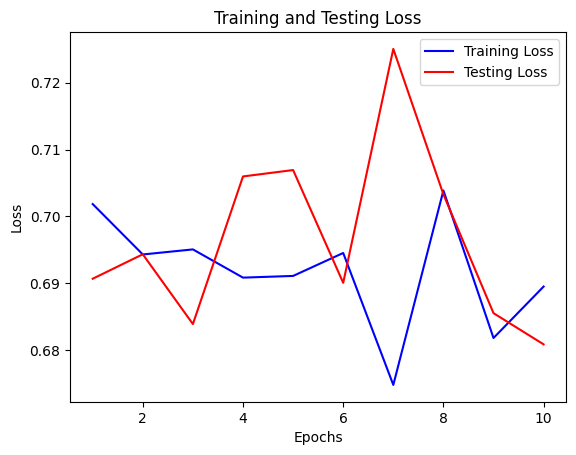

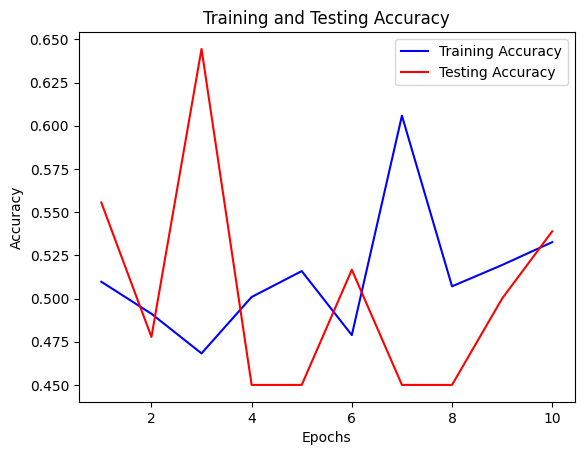

In [7]:
# Develop a test harness for model evaluation
def evaluate_model(model, train_generator, test_generator, n_epochs=10, n_folds=5):
    train_loss_histories, train_accuracy_histories = [], []
    test_loss_histories, test_accuracy_histories = [], []

    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        train_loss_epoch, train_accuracy_epoch = [], []
        test_loss_epoch, test_accuracy_epoch = [], []

        for train_batch in train_generator:
            train_loss, train_accuracy = model.train_on_batch(train_batch[0], train_batch[1])
            train_loss_epoch.append(train_loss)
            train_accuracy_epoch.append(train_accuracy)
            if len(train_loss_epoch) >= len(train_generator):
                break

        train_loss_histories.append(np.mean(train_loss_epoch))
        train_accuracy_histories.append(np.mean(train_accuracy_epoch))

        for test_batch in test_generator:
            test_loss, test_accuracy = model.evaluate(test_batch[0], test_batch[1], verbose=0)
            test_loss_epoch.append(test_loss)
            test_accuracy_epoch.append(test_accuracy)
            if len(test_loss_epoch) >= len(test_generator):
                break

        test_loss_histories.append(np.mean(test_loss_epoch))
        test_accuracy_histories.append(np.mean(test_accuracy_epoch))

        print(f"Train Loss: {train_loss_histories[-1]:.4f}, Train Accuracy: {train_accuracy_histories[-1]*100:.2f}%")
        print(f"Test Loss: {test_loss_histories[-1]:.4f}, Test Accuracy: {test_accuracy_histories[-1]*100:.2f}%")
        print("-" * 50)

    return train_loss_histories, train_accuracy_histories, test_loss_histories, test_accuracy_histories

# Define a baseline CNN model
def baseline_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Evaluate the baseline model
baseline_model = baseline_model((img_width, img_height, 3))
train_loss_histories, train_accuracy_histories, test_loss_histories, test_accuracy_histories = evaluate_model(baseline_model, train_generator, test_generator)

# Plot training and testing loss and accuracy curves
epochs = range(1, len(train_loss_histories) + 1)

plt.plot(epochs, train_loss_histories, 'b', label='Training Loss')
plt.plot(epochs, test_loss_histories, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_histories, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy_histories, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Remarks:** The dataset had a very had time to predict and hence the low accuracy and high loss, with this it is concluded that the dataset couldn't be process well.

#Summary, Conclusions, Lesson Learned

In summary using the CNN deep learning model is a great model to use for classifying images and make the computers learn and predict pictures that are being inputed into the computer, however it is too heavy on processing power to process images, in addition it is also having a hard time to process due to devices being incompatibe or way beyond the processing power that my device can do.